## Imports and preamble

These are external libraries, including your own code stored in separate .py files, that you want to import in order to run the notebook. Since our notebook environment is running in Python, we don't need to import the language itself.

 However, it's worth checking that you are using the right version of Python (usually Python 3)

 For larger projects, you will want to use separate virtual environments for different projects. It's a good idea to double check your environment

In [2]:
# pre-installed library containing a grab bag of system functions
import sys
print(sys.version)

# Import some local code, which I'll use behind the scenes
# from ../resources import helper_functions

# Wipe all outputs from this notebook
from IPython.display import Image, clear_output
clear_output(True)

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]


# External libraries

A major benefit of the Python ecosystem
+ Common libraries you might use in the sciences include
+ + matplotlib (plotting)
+ + numpy (linear algebra; lots of MATLAB functions)
+ + scipy (common scientific algorithms)
+ + scikit-learn (machine learning)

Major libraries we will see:
+ + numba (just-in-time compilation of numpy-based code)
+ + pandas (large dataset organization; lots of R functionality)
+ + statsmodels (statistics; lots of R functionality)
+ + seaborn (plotting; alternative to matplotlib with API similar to R's ggplot)
+ + PyTorch (deep learning)
+ + JAX (deep learning)


Typical usage (in terminal): install 

    conda activate myenvironment
    conda install pandas

When conda fails, or the package is not available, use pip

    pip install pandas

Then either launch launch JupyterLab from terminal, or open VSCode app and select the appropriate environment in the upper-right hand corner


In [2]:
import matplotlib.pyplot as plt # Plotting library
import numpy as np # Linear algebra library
import scipy # General scientific computing library

# from numpy import *

/Users/william/miniconda3/envs/cphy/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Arrays, indexing, broadcasting, vectorization

+ Numpy is technically an external library, but we will use it so often in scientific computing that it's basically a built-in data type for our purposes.

+ Suite of support for the `np.ndarray`` datatype, which represents tensors. Most MATLAB functions are within numpy

In [3]:
import numpy as np

a = np.arange(10)

print(a)

[0 1 2 3 4 5 6 7 8 9]


## The logistic map

The logistic map is a polynomial mapping (equivalently, recurrence relation) of degree 2, often cited as an archetypal example of how complex, chaotic behaviour can arise from very simple non-linear dynamical equations.

The map is defined by:

$$x_{n+1} = r x_n (1 - x_n)$$

where the dynamical variable $x_n \in (0, 1)$ is a number between zero and one. The parameter $r$ represents a growth rate, and varies between zero and four. For $r$ values between zero and one, the population always dies out. However, as $r$ increases past one, a bifurcation occurs at $r=3$, where the population begins to oscillate between two values. As $r$ increases further, period doubling occurs, leading to four values, then eight, and so on, until finally chaos occurs, and the population takes on seemingly random values between zero and one.

Text(0, 0.5, 'x')

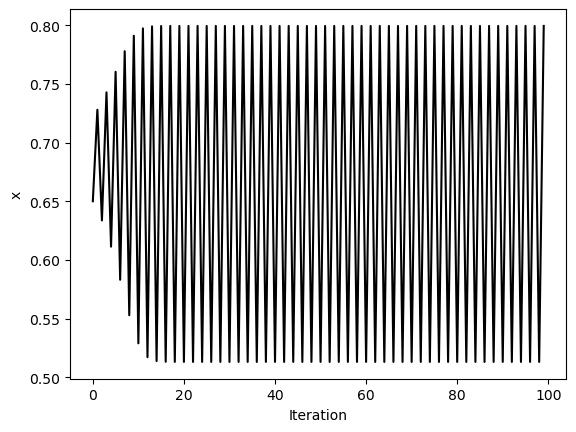

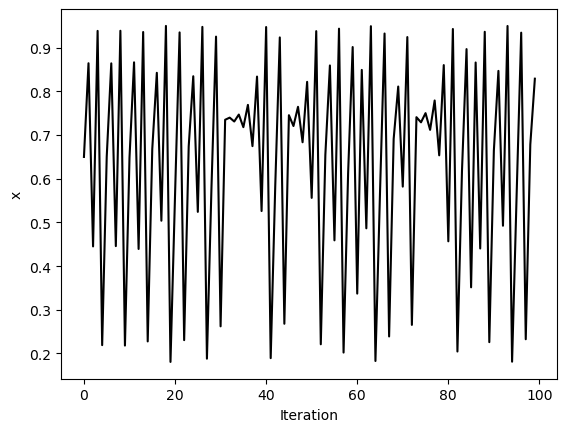

In [22]:
# logistic map

import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    """
    The logistic map, a discrete-time dynamical system.
    """
    return r * x * (1 - x)

r = 3.2
x = [0.65]
for i in range(1, 100):
    x.append(logistic_map(x[i-1], r))
plt.figure()
plt.plot(x, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')



r = 3.8
x = [0.65]
for i in range(1, 100):
    x.append(logistic_map(x[i-1], r))
plt.figure()
plt.plot(x, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')


## Runtime complexity and dynamical systems

+ A common question we might ask for an algorithm is: How does the runtime scale with the input size? What about the memory usage?

+ These are sometimes called the asymptotic *time and space complexities* of an algorithm.

+ The asymptotic complexity of an algorithm is *independent* of the hardware and software environment. It is a representationn-invariant mathematical property of the algorithm.

In [5]:
def simulate_logistic(n, r=3.8, x0=0.5):
    """
    Simulate the logistic map for n iterations using numpy and preallocation
    """
    x = np.zeros(n) # Preallocate an array of zeros
    x[0] = x0
    for i in range(1, n):
        prev = x[i-1]
        x[i] = r * prev * (1 - prev)
    return x

%timeit simulate_logistic(10000)

2.4 ms ± 47.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Text(0, 0.5, 'Runtime (s)')

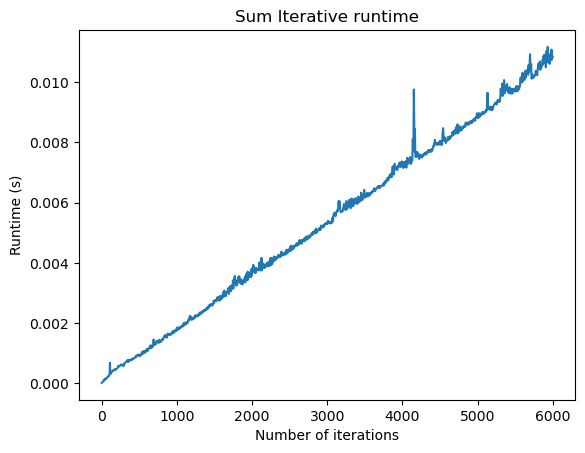

In [62]:
import timeit

n_vals = np.arange(1, 6000, 5)
# n_vals = np.logspace(1, 5, 50, dtype=np.int32)

times = []
for n in n_vals:
    times.append(timeit.timeit("simulate_logistic(n)", globals=globals(), number=10))

plt.figure()
plt.plot(n_vals, times)
plt.title("Sum Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")


Notice that there are two regimes on this plot: a nonlinear regime where the runtime scales nonlinearly, and an asymptotic regime where the runtime scales linearly. The linear regime is the regime where the problem is memory bound, and the nonlinear regime is the regime where the problem is compute bound.

Why is the runtime $\sim N$? We only "touch" each element of our solution array twice---once to calculate it, and once to update the next state. We don't need to look back at all the previous states.

The memory usage is also $\sim N$ because we are storing the full, cumulative history in order to plot the trajectory. If we only wanted to plot the final state, we could get away with only storing the final state. In this case, the memory would be $\sim 1$.

# Slicing and indexing numpy arrays

+ These are extremely useful for manipulating arrays in Python

### Slicing

Text(0, 0.5, 'Next Iteration')

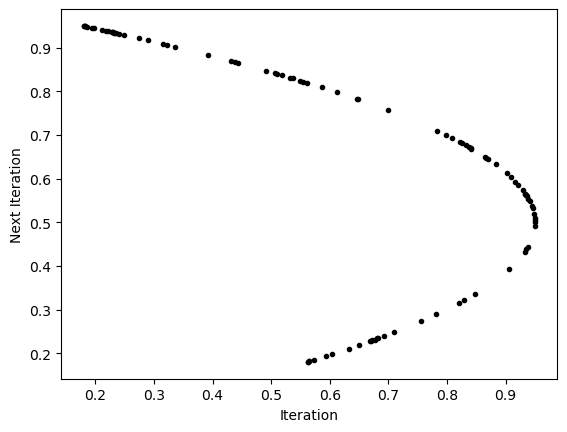

In [19]:
traj = simulate_logistic(100)

plt.figure()
plt.plot(traj[1:], traj[:-1], '.k')
plt.xlabel('Iteration')
plt.ylabel('Next Iteration')



### Boolean Selection with numpy arrays

+ Can pass boolean arrays of the same shape as an array


Text(0, 0.5, 'x')

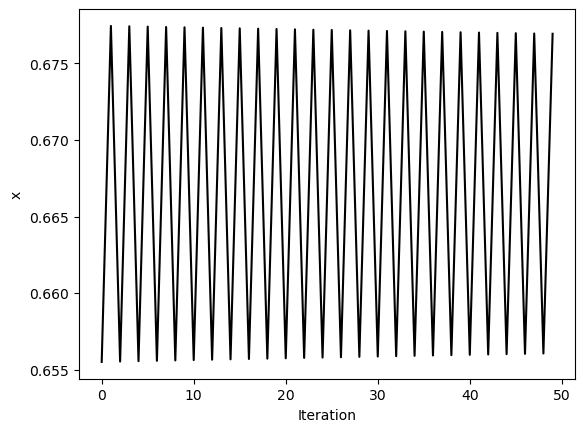

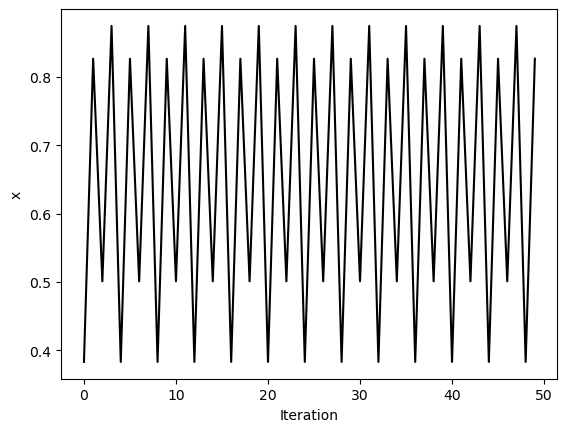

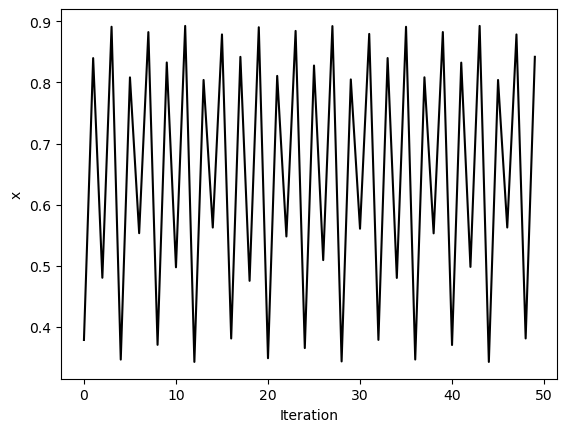

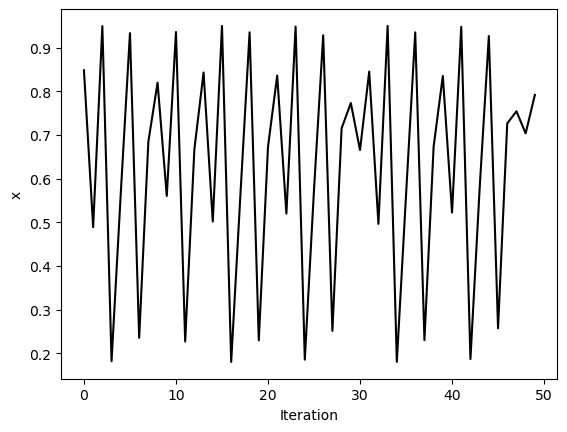

In [47]:
# simulate before and after period doubling
# Take last 50 iterations to remove transient

traj2 = simulate_logistic(500, r=3)[-50:]
plt.figure()
plt.plot(traj2, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

traj4 = simulate_logistic(500, r=3.5)[-50:]
plt.figure()
plt.plot(traj4, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

traj8 = simulate_logistic(1000, r=3.57)[-50:]
plt.figure()
plt.plot(traj8, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

traj_inf = simulate_logistic(500)[-50:]
plt.figure()
plt.plot(traj_inf, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

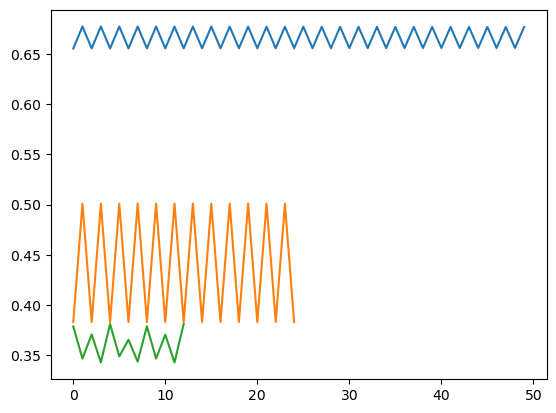

In [49]:
plt.plot(traj2)
plt.plot(traj4[::2])
plt.plot(traj8[::4])

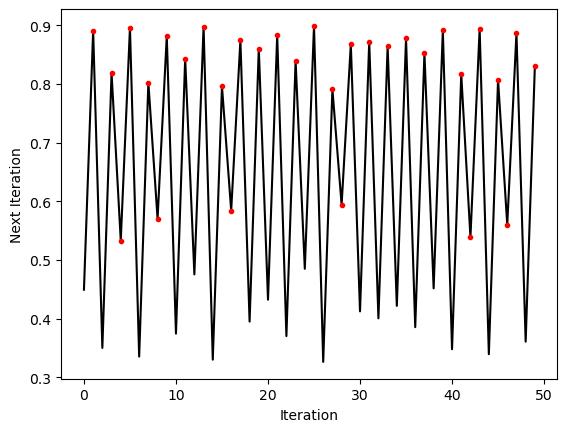

In [54]:
select_inds = traj > 0.5
nvals = np.arange(len(traj))

plt.figure()
plt.plot(nvals, traj, 'k')
plt.xlabel('Iteration')
plt.ylabel('Next Iteration')
plt.plot(nvals[select_inds], traj[select_inds], '.r')


(5, 5)


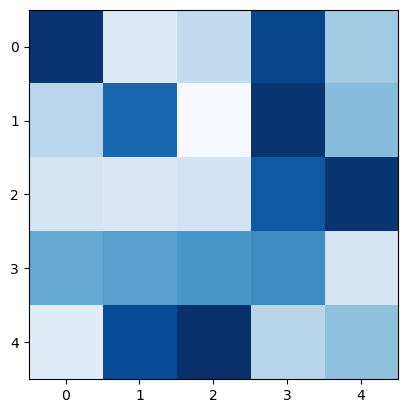

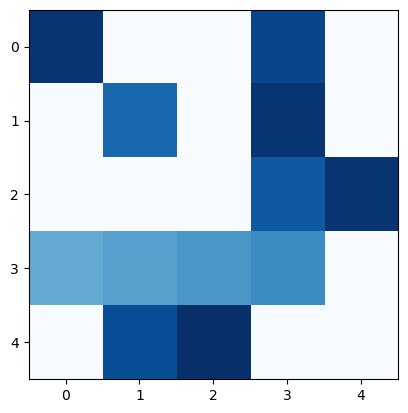

In [57]:
a = np.random.random((5, 5))

plt.figure()
plt.imshow(a, cmap='Blues', vmin=0)

print((a < 0.5).shape)

a[a < 0.5] = 0
plt.figure()
plt.imshow(a, cmap='Blues', vmin=0)

### Fancy indexing

+ Can pass lists of indices to modify

In [58]:
a = np.array([1, 2, 3, 4, 5, 6, 7])

sel_inds = [0, 2, 4]

a[sel_inds] = 0
print(a)

[0 2 0 4 0 6 7]


### Broadcasting

+ We can slice numpy arrays just like lists, but in multiple dimensions
+ singleton dimensions versus empty dimensions
+ Lifting dimensionality makes linear algebra easier

In [71]:
positions = np.random.random(size=(1000,))

print("Empty dimensions", positions.shape) # Elementwise (Hadamard)
print((positions * positions.T).shape)


Empty dimensions (1000,)
(1000,)


In [70]:
positions = np.random.random(size=(1000,))
positions = positions[:, None]

print("Singleton dimensions", positions.shape)
print((positions * positions.T).shape) # Implicit outer product 

Singleton dimensions (1000, 1)
(1000, 1000)


# Vectorization

+ Does not change runtime scaling, but changes the prefactor
+ Runtime at expense of memory

Let's try finding the pairwise distance matrix between two sets of points in two-dimensions. We will do this in two ways: a naive way, and a vectorized way.

In [59]:
# Random positions dataset
positions = np.random.random(size=(100, 2))

positions.shape

(100, 2)

In [60]:

# pairwise distance matrix will be 100 x 100
def find_distances_iterative(positions):
    """Find the pairwise distances between a set of points"""
    list_of_distances = list()
    for i in range(positions.shape[0]):
        row_distances = list()
        for j in range(positions.shape[0]):
            row_distances.append(
                np.sqrt(
                    np.sum((positions[i, :] - positions[j, :])**2)
                )
            )
            list_of_distances.append(row_distances)
    distance_matrix = np.array(list_of_distances)
    return distance_matrix

%timeit find_distances_iterative(positions)



In [79]:

def find_distances_preallocated(positions):
    """
    Find distance matrix with preallocated memory and built-in elementwise numpy functions
    """
    distances = np.zeros((positions.shape[0], positions.shape[0]))
    for i in range(positions.shape[0]):
        for j in range(positions.shape[0]):
            distances[i, j] = np.linalg.norm(positions[i, :] - positions[j, :])
    return distances

%timeit find_distances_preallocated(positions)


51.4 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [80]:
# pairwise distance matrix
def find_distances_vectorized(positions):
    """
    Find distance matrix vectorized with broadcasting
    """
    return np.linalg.norm(positions[:, None, :] - positions[np.newaxis, :, :], axis=2)

%timeit find_distances_vectorized(positions)

265 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [83]:
import timeit

n_vals = np.arange(1, 100, 1)

all_times = []
for n in n_vals:
    time1 = timeit.timeit("find_distances_iterative(np.random.random((n, 2)))", globals=globals(), number=n)
    time2 = timeit.timeit("find_distances_preallocated(np.random.random((n, 2)))", globals=globals(), number=n)
    time3 = timeit.timeit("find_distances_vectorized(np.random.random((n, 2)))", globals=globals(), number=n)
    all_times.append([time1, time2, time3])
all_times = np.array(all_times)




Text(0, 0.5, 'Runtime (s)')

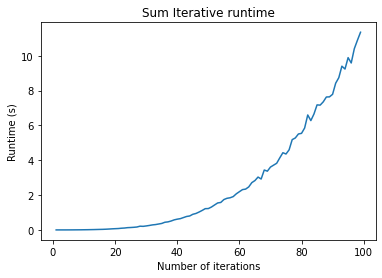

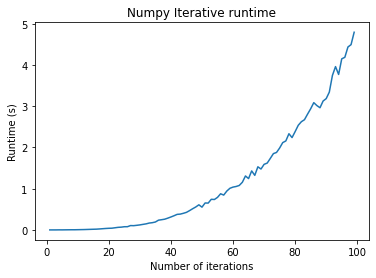

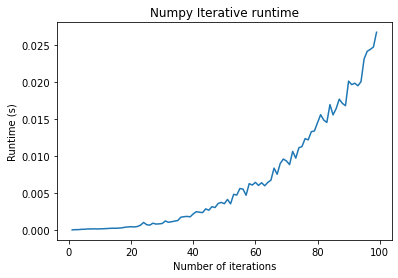

In [84]:
plt.figure()
plt.plot(n_vals, all_times[:, 0])
plt.title("Sum Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, all_times[:, 1])
plt.title("Numpy Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, all_times[:, 2])
plt.title("Numpy Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

### The Mandelbrot set and fractals

Creation of the fractal Mandelbrot set involves defining a 2D lattice, and then iterating the following function at each lattice point:


$$
z_{t + 1} = z_{t}^2 + c
$$
where the complex number $z = x + i y$ encodes a 2D spatial position. This update rule is equivalent to the 2D update rule

$$
x_{t + 1} = x_t^2 - y_t^2 + c \\
y_{t + 1} = 2 x y 
$$

For the Mandelbrot set, we are interested in plotting, for each initial condition $z_0$, the asymptotic value $\lim_{n \rightarrow \infty} |z_n|$. For some points the set diverges.

*Adapted from Loic Hebert's [book](https://lhoupert.fr/test-jbook/04-code-vectorization.html#uniform-vectorization)*


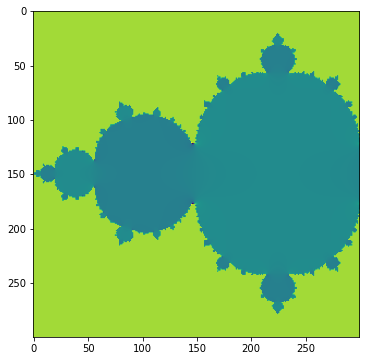

In [2]:


def mandelbrot_iterative(z, maxiter=20, horizon=2.0, c=-3/4):
    """
    An implementation of the Mandelbrot set using iterative loops
    We use the built-in complex type, although we could have also split into separate 
    iterations for the real and imaginary parts

    Args:
        z (complex): A 2D array of complex numbers to iterate
        maxiter (int): The maximum number of iterations to perform
        horizon (float): The maximum value of the magnitude of the complex number
        c (complex): The control parameter for the map
    """
    n, m = z.shape
    
    for i in range(n):
        for j in range(m):
            for t in range(maxiter):
                if abs(z[i, j]) >= horizon:
                    z[i, j] = horizon
                else:
                    z[i, j] = z[i, j]**2 + c#c[j, i]
    return z


# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 300), np.linspace(-1, 1, 300))
zz = xx + 1j * yy
horizon_vals = mandelbrot_iterative(zz)

plt.figure(figsize=(12, 6))
plt.imshow(np.real(horizon_vals), cmap="viridis")

Text(0.5, 1.0, 'Mandelbrot Set Angle (Zoomed In)')

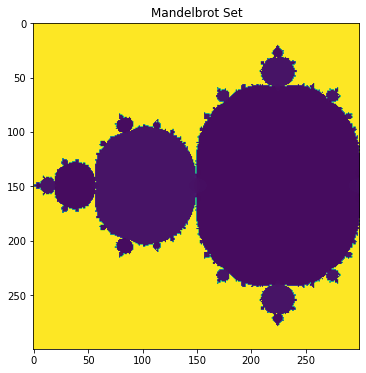

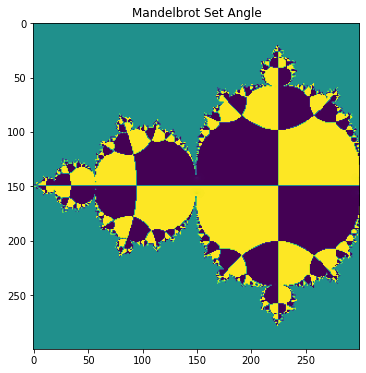

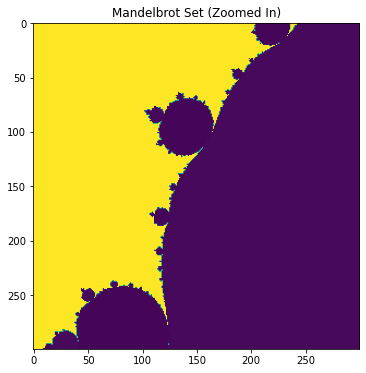

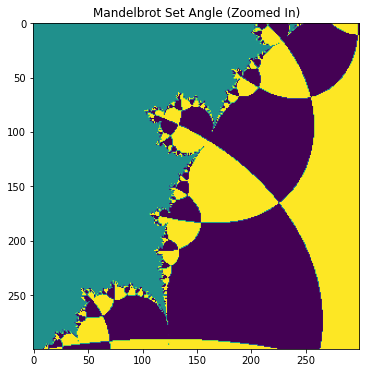

In [35]:
def mandelbrot_numpy(z, maxiter=20, horizon=5.0, c=-3/4):
    """
    A vectorized implementation of the Mandelbrot set using numpy
    """
    z = z.astype(np.complex64) # cast to numpy's own complex type
    for t in range(maxiter):
        z[np.abs(z) <= horizon] = z[np.abs(z) <= horizon]**2 + c
        z[np.abs(z) > horizon] = horizon

    return z

# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 300), np.linspace(-1, 1, 300))
zz = xx + 1j * yy
horizon_vals = mandelbrot_numpy(zz, maxiter=200)

plt.figure(figsize=(12, 6))
plt.imshow(np.abs(horizon_vals), cmap="viridis")
plt.title("Mandelbrot Set")

plt.figure(figsize=(12, 6))
plt.imshow(np.angle(horizon_vals), cmap="viridis")
plt.title("Mandelbrot Set Angle")


# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-0.385, -0.355, 300), np.linspace(-0.52, -0.55, 300))
zz = xx + 1j * yy
horizon_vals = mandelbrot_numpy(zz, maxiter=10*100)
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(horizon_vals), cmap="viridis")
plt.title("Mandelbrot Set (Zoomed In)")


plt.figure(figsize=(6, 6))
plt.imshow(np.angle(horizon_vals), cmap="viridis")
plt.title("Mandelbrot Set Angle (Zoomed In)")

Text(0, 0.5, 'Runtime (s)')

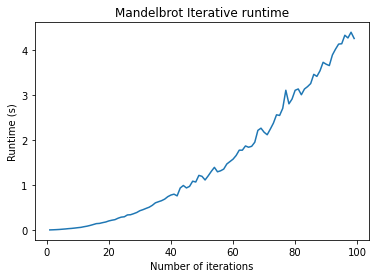

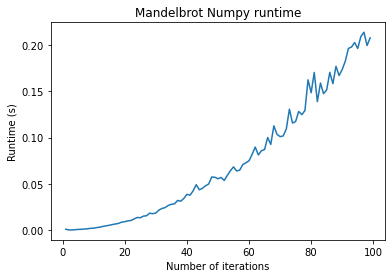

In [149]:
import timeit

n_vals = np.arange(1, 100, 1)

# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 30), np.linspace(-1, 1, 30))
zz = xx + 1j * yy

all_times = []
for n in n_vals:
    time1 = timeit.timeit(
        "mandelbrot_iterative(zz, maxiter=n)", globals=globals(), number=n
    )
    time2 = timeit.timeit(
        "mandelbrot_numpy(zz, maxiter=n)", globals=globals(), number=n
    )
    all_times.append([time1, time2])
all_times = np.array(all_times)

plt.figure()
plt.plot(n_vals, all_times[:, 0])
plt.title("Mandelbrot Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, all_times[:, 1])
plt.title("Mandelbrot Numpy runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

# Some other useful built-ins for iterables

+ zip and enumerate are not strictly necessary (there are other ways to do the same thing), but they can make our syntax a bit cleaner and more concise. Functions like this are sometimes called "syntactic sugar"


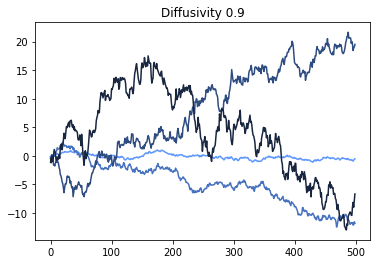

In [266]:
# enumerate provies a tuple of index and value
diffusivities = [0.1, 0.3, 0.6, 0.9]

weiner_process = lambda n, signma: np.cumsum(np.random.normal(0, signma, n))
blue = np.array([0.372549, 0.596078, 1])
for i, sigma in enumerate(diffusivities):
    plt.plot(weiner_process(500, sigma), color=blue * (1 - i / len(diffusivities)))
    plt.title(f"Diffusivity {sigma}")

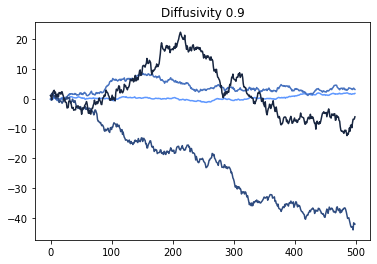

In [268]:
# zip pairs values together
diffusivities = [0.1, 0.3, 0.6, 0.9]

weiner_process = lambda n, signma: np.cumsum(np.random.normal(0, signma, n))
colors = np.array([0.372549, 0.596078, 1]) * (1 - np.arange(0, 1, 0.25)[:, None])
for color, sigma in zip(colors, diffusivities):
    plt.plot(weiner_process(500, sigma), color=color)
    plt.title(f"Diffusivity {sigma}")

## Generators

+ Generators are functions with an internal "state" that serves as a memory
+ Conceptually, they are intermediate between functions and custom objects
+ Generators can be useful when you don't want to store an entire array in memory

In [275]:
def weiner_process(x, max_iter=1000):
    for i in range(100):
        yield x + np.random.normal(0, 1)

# next causes the generator to run until the next yield
process = weiner_process(0)
for i in range(50):
    print(next(process))

1.0854339875048087
-0.6306183121546539
0.9046260382688128
0.4531820617324658
-0.808476394605633
1.69813707350036
-0.10889468951915561
1.0816503069553836
-0.1641697658804684
0.795190707193173
-0.18117155341567806
-0.7035671068914807
-0.6624125941040329
0.5194670301325016
-0.3511876840742135
0.06445341007679474
0.37431047176675003
0.42585851113957124
-1.311510103653711
1.5641783227645105
-1.176658205416261
0.34262199798818915
-0.774959555130414
-0.2715825094720521
1.214601945735314
-0.7222569014213631
-0.8546904440046476
-0.9168290022656728
-0.07579583991808671
0.23941496713527616
0.5716049995967908
1.055681395211403
-0.9960892501233416
-0.9285135134667982
-0.09443114930837106
0.5521484843603496
-0.4906146632116013
1.2265268595914947
0.4149570807168994
0.24271138175203935
1.038543411525472
-0.510328503006917
0.3017768688418901
-0.9317098990910221
-0.07572284741010381
1.2147836628686492
-0.4252776378137409
1.0218920667928268
0.5696565866149781
-0.5982680493769834
